In [1]:
import os, fucoes_extras #Funcoes de diretorio e funcoes extras
from sklearn.model_selection import train_test_split #Importando Hold-out
import pandas as pd #Importando o pandas (leitor e escritor de arquivos)
from numpy import genfromtxt #Leitor de .csv e conversor p/ array numpy
from os import listdir #Importando buscador de arquivos
from machine_learn import svm_andre, rna_mlp #Importando SVM e RNA
import statistics
import numpy as np

In [2]:
diretorio= os.getcwd()+"/dados_csv/" #Busca o diretorio automaticamente

#Parametros p/ SVM
C= 1.0
gamma= 'auto'
kernel= 'rbf'
#Parametros p/ RNA
max_iter=300
hidden_layer_sizes= (100,100) #Testar (50, 50) e (100, 100)
learning_rate= 'constant'
learning_rate_init= 0.01

In [3]:
acur_RNA= []
acur_SVM= []

acurB_RNA= []
acurB_SVM= []

matrizC_RNA= []
matrizC_SVM= []

media_SVM= []
des_SVM= []
media_RNA= []
des_RNA= []

mediaB_SVM= []
desB_SVM= []
mediaB_RNA= []
desB_RNA= []

matrizC_R= []
matrizC_S= []

extractor_name= []

In [4]:
for nome in listdir(diretorio):
    dados= genfromtxt((diretorio+nome), delimiter=',',skip_header=1)

    classCol = dados.shape[1] - 1
    y = dados[:,classCol]
    x = dados[:, :(classCol-1)]
    
    x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.25, 
                                                        random_state=1234, stratify=y) #Hold-out
    
    datas = x_train, x_test, y_train, y_test
    HO_data = pd.DataFrame(np.array(datas)) #Lendo os valores p/ exportacao em .csv
    HO_data.to_csv('hold_out_data.csv') #Salvando em .csv
        
    #Treinando e avaliando o desempenho da SVM
    S= svm_andre.SVM(x_train, y_train, x_test, y_test, C, gamma, kernel)
    acur_SVM.append(S[0]) #Lista de acuracias
    acurB_SVM.append(S[1]) #Lista de acuracias balanceadas
    matrizC_SVM.append(S[2]) #Lista de matrizes de confusao
    
    #Treinando e avaliando o desempenho da RNA
    R= rna_mlp.RNAs(x_train, y_train, x_test, y_test, learning_rate_init,
                    learning_rate, hidden_layer_sizes, max_iter)
    acur_RNA.append(R[0]) #Lista de acuracias
    acurB_RNA.append(R[1]) #Lista de acuracias balanceadas
    matrizC_RNA.append(R[2]) #Lista de matrizes de confusao
    
    extractor_name.append(nome[:-4])

Resultados graficos:


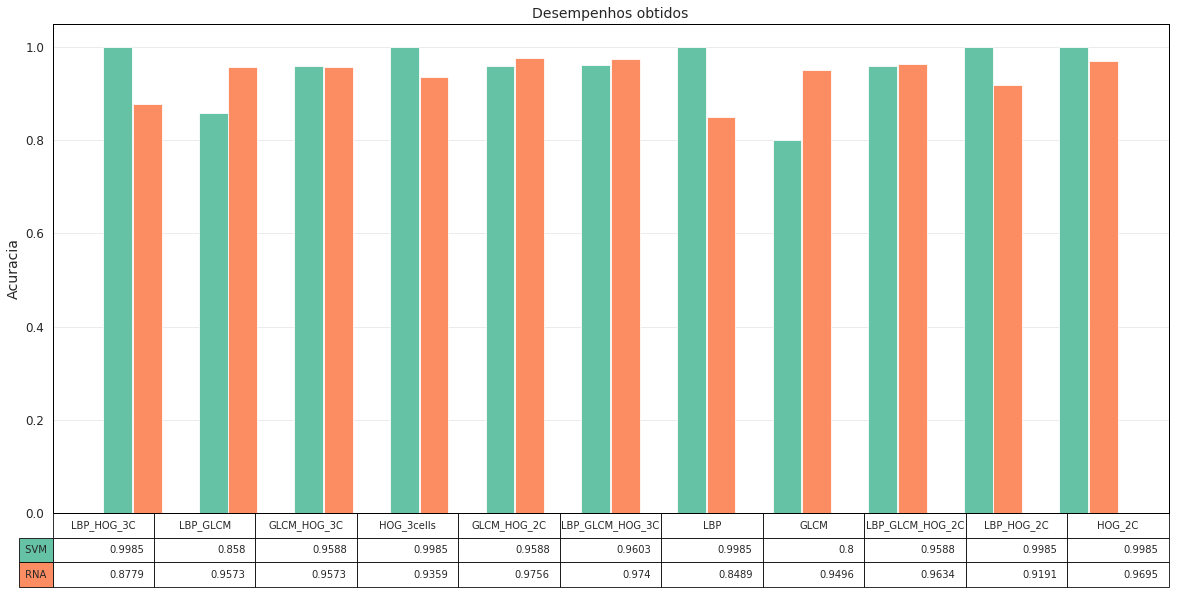

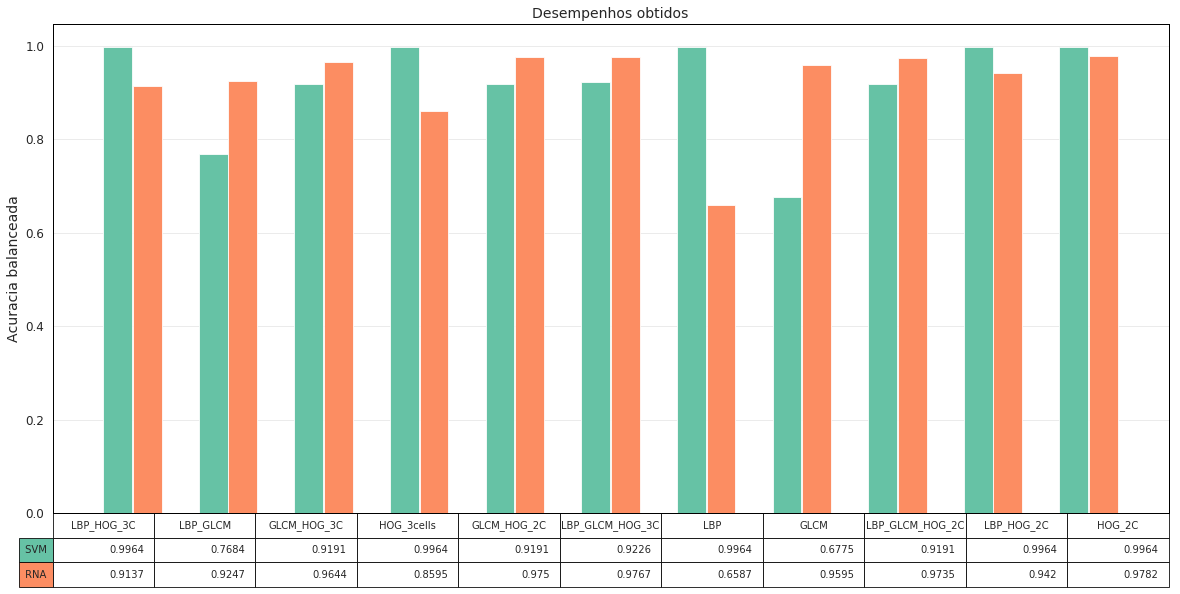

In [5]:
#print("Matrizes de confusao:\n")

fs = open(os.getcwd()+"/results/matrix_svm.txt", "w")
fr = open(os.getcwd()+"/results/matrix_rna.txt", "w")

for i in range(0,len(extractor_name)):
    fs.writelines("\n **" + extractor_name[i] + "**\n")
    fs.write("%s\n" % matrizC_SVM[i])
    fr.writelines("\n **" + extractor_name[i] + "**\n")
    fr.write("%s\n" % matrizC_RNA[i])
    
fs.close()
fr.close()

print("Resultados graficos:")
fucoes_extras.grafico(acur_SVM, 0, acur_RNA, 0, extractor_name, "Acuracia", "acc")
fucoes_extras.grafico(acurB_SVM, 0, acurB_RNA, 0, extractor_name, "Acuracia balanceada", "bac")